## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
# For data manipulation and analysis
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning and data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

# For natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# For web scraping
import requests
from bs4 import BeautifulSoup

# For working with dates and times
from datetime import datetime

# For handling JSON data
import json

# For interacting with databases
import sqlite3

# For working with images
from PIL import Image

# For regular expressions
import re

# For accessing operating system functionalities
import os

# For handling files and directories
import glob

# For mathematical operations
import math

# For handling exceptions
import traceback

# For working with regular expressions
import re

# For working with Excel files
import openpyxl

# For handling CSV files
import csv


### Load the dataset

In [10]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')


### 1. Make a list of categorical and numerical columns in the data.

In [9]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Get the list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Get the list of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
['sex', 'smoker', 'day', 'time']

Numerical Columns:
['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [10]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Compute the average bill amount for each day
average_bill_per_day = df.groupby('day')['total_bill'].mean()

print("Average bill amount for each day:")
print(average_bill_per_day)


Average bill amount for each day:
day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [11]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Compute the average tip amount for each gender
average_tip_per_gender = df.groupby('sex')['tip'].mean()

print("Average tip amount for each gender:")
print(average_tip_per_gender)


Average tip amount for each gender:
sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


### 4. According to the data, were there more customers for dinner or lunch?

In [12]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Count the number of entries for each time category
customer_count_by_time = df['time'].value_counts()

print("Number of customers for each time:")
print(customer_count_by_time)


Number of customers for each time:
Dinner    176
Lunch      68
Name: time, dtype: int64


### 5. Based on the statistical summary, comment on the variable 'tip'

In [13]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Calculate statistical summary for the 'tip' variable
tip_summary = df['tip'].describe()

print("Statistical summary for the 'tip' variable:")
print(tip_summary)


Statistical summary for the 'tip' variable:
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


### 6. Find the busiest day in terms of the orders?

In [14]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Count the number of orders for each day
orders_per_day = df['day'].value_counts()

# Find the busiest day
busiest_day = orders_per_day.idxmax()

print("Busiest day in terms of orders:", busiest_day)


Busiest day in terms of orders: Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

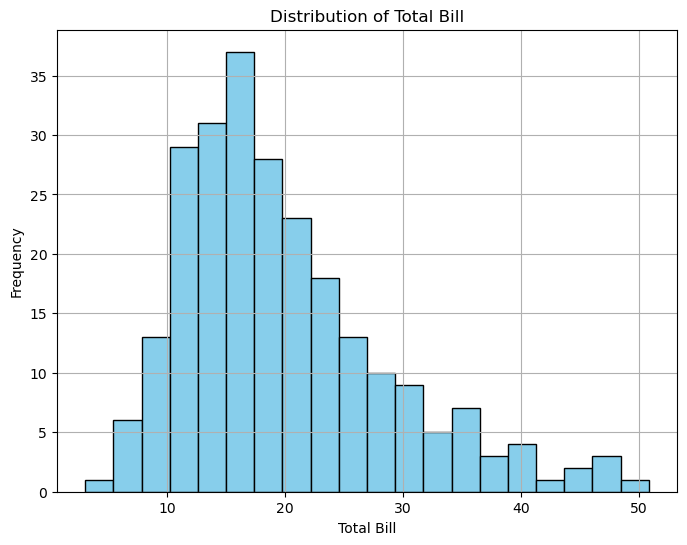

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Plot histogram of 'total_bill' variable
plt.figure(figsize=(8, 6))
plt.hist(df['total_bill'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This code will create a histogram plot of the 'total_bill' variable using the plt.hist() function from the matplotlib library. By visually inspecting the plot, you can determine whether the distribution of 'total_bill' is skewed and, if so, the direction of skewness.

If the histogram appears asymmetrical, it indicates skewness in the data. Additionally, you can calculate the skewness measure using pandas to quantify the skewness. Here's how you can calculate skewness

In [16]:
skewness = df['total_bill'].skew()
print("Skewness of 'total_bill' variable:", skewness)

Skewness of 'total_bill' variable: 1.1332130376158205


### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

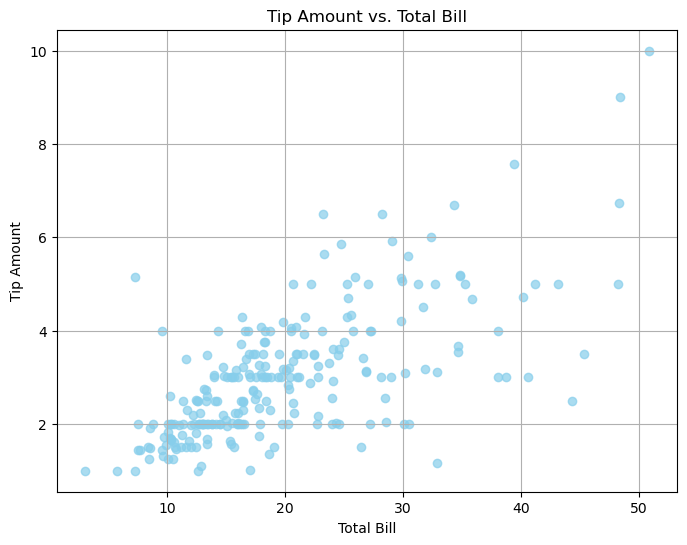

Correlation coefficient between tip amount and total bill: 0.6757341092113646


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Create a scatter plot of tip amount vs. total bill
plt.figure(figsize=(8, 6))
plt.scatter(df['total_bill'], df['tip'], color='skyblue', alpha=0.7)
plt.title('Tip Amount vs. Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between tip amount and total bill
correlation_coefficient = df['total_bill'].corr(df['tip'])
print("Correlation coefficient between tip amount and total bill:", correlation_coefficient)


This code will create a scatter plot of the tip amount against the total bill using the plt.scatter() function from the matplotlib library. By visually inspecting the plot, you can observe the relationship between the two variables. Additionally, the code calculates the correlation coefficient between the tip amount and the total bill using the corr() function from pandas.

The correlation coefficient ranges from -1 to 1:

If it is close to 1, it indicates a strong positive linear relationship (as the total bill increases, the tip amount also tends to increase).
If it is close to -1, it indicates a strong negative linear relationship (as the total bill increases, the tip amount tends to decrease).
If it is close to 0, it indicates no linear relationship between the variables.
Based on the scatter plot and the correlation coefficient, you can write your findings about the dependency of the tip amount on the total bill.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

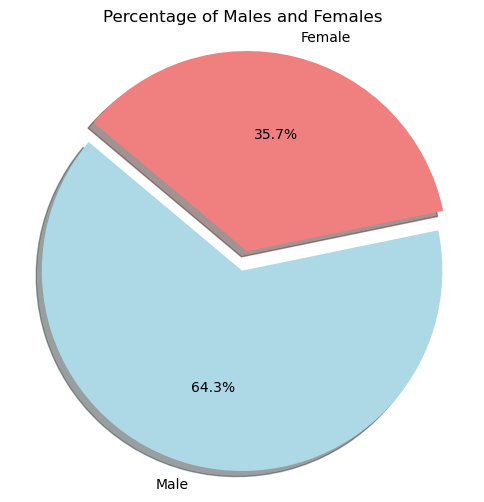

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Calculate the number of males and females
gender_counts = df['sex'].value_counts()

# Calculate the percentage of males and females
male_percentage = (gender_counts['Male'] / len(df)) * 100
female_percentage = (gender_counts['Female'] / len(df)) * 100

# Plot the pie chart
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice (Male)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Males and Females')
plt.axis('equal')
plt.show()


This code will calculate the percentage of males and females in the dataset and then plot a pie chart to visualize the distribution. The pie chart will show the proportion of males and females, with labels indicating the gender and percentages representing their respective proportions in the dataset.

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

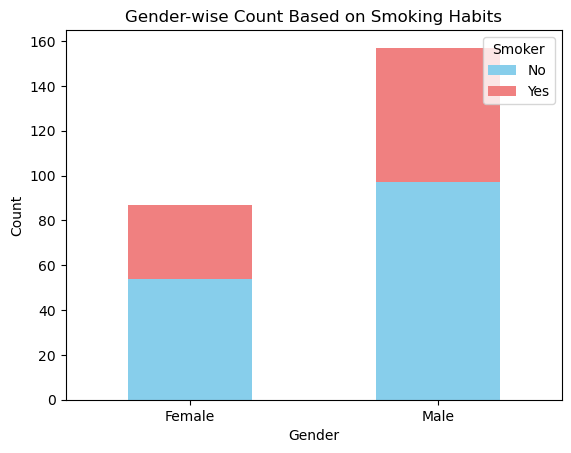

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Compute gender-wise count based on smoking habits
gender_smoking_count = df.groupby(['sex', 'smoker']).size().unstack()

# Plot the bar chart
gender_smoking_count.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Gender-wise Count Based on Smoking Habits')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Smoker', loc='upper right')
plt.show()


This code will group the data by both gender and smoking habits using the groupby() function in pandas. Then, it will calculate the counts for each combination of gender and smoking habits and unstack the result to create a DataFrame where the columns represent smoking habits and the rows represent gender. Finally, it will plot a stacked bar chart to visualize the gender-wise count based on smoking habits.

### 11. Compute the average tip amount given for different days and display it in the plot.

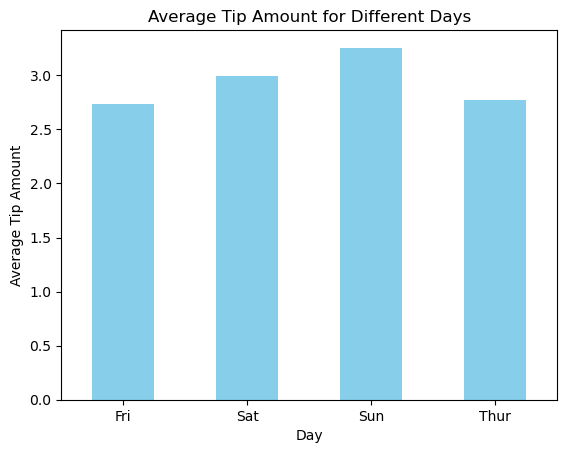

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Compute the average tip amount for different days
average_tip_per_day = df.groupby('day')['tip'].mean()

# Plot the bar chart
average_tip_per_day.plot(kind='bar', color='skyblue')
plt.title('Average Tip Amount for Different Days')
plt.xlabel('Day')
plt.ylabel('Average Tip Amount')
plt.xticks(rotation=0)
plt.show()


This code will group the data by days using the groupby() function in pandas. Then, it will calculate the mean tip amount for each day using the mean() function and create a bar chart to visualize the average tip amount for different days.

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

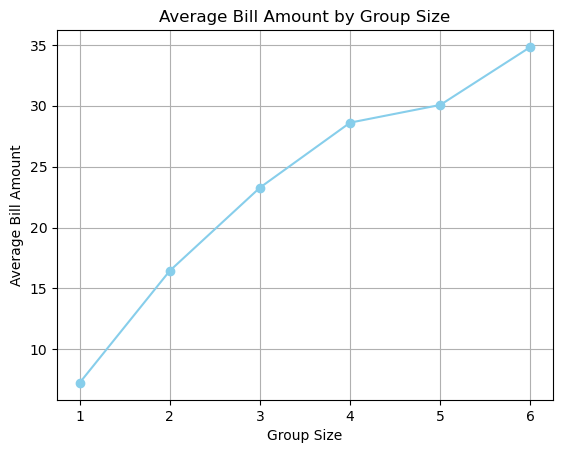

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Compute the average bill amount for each group size
average_bill_per_size = df.groupby('size')['total_bill'].mean()

# Plot the line chart
plt.plot(average_bill_per_size, marker='o', color='skyblue')
plt.title('Average Bill Amount by Group Size')
plt.xlabel('Group Size')
plt.ylabel('Average Bill Amount')
plt.grid(True)
plt.xticks(average_bill_per_size.index)
plt.show()


This code will group the data by group size using the groupby() function in pandas. Then, it will calculate the mean bill amount for each group size using the mean() function. Finally, it will create a line chart to visualize the relationship between the average bill amount and the group size.

After visualizing the relationship, you can interpret the plot to determine whether the average bill amount is dependent on the size of the group. If there is a noticeable trend or pattern in the plot, it suggests that the average bill amount may be dependent on the size of the group.

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

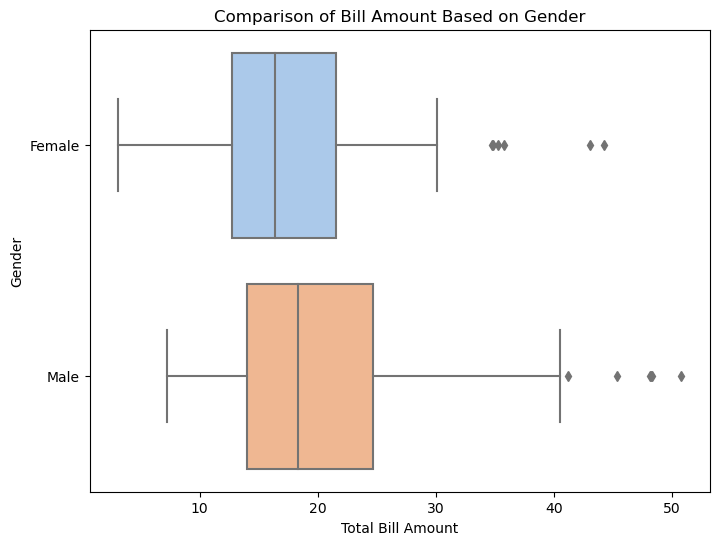

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Plot a horizontal boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='total_bill', y='sex', data=df, orient='h', palette='pastel')
plt.title('Comparison of Bill Amount Based on Gender')
plt.xlabel('Total Bill Amount')
plt.ylabel('Gender')
plt.show()

This code will create a horizontal boxplot using the seaborn library, with the 'total_bill' on the x-axis and 'sex' on the y-axis. Each box represents the distribution of bill amounts for a particular gender, allowing for a visual comparison of bill amounts between males and females.

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [24]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Filter the dataset for lunch and dinner on Saturday and Sunday
weekend_data = df[(df['day'].isin(['Sat', 'Sun'])) & (df['time'].isin(['Lunch', 'Dinner']))]

# Find the maximum bill amount for lunch and dinner on Saturday and Sunday
max_bill_amount = weekend_data.groupby(['day', 'time'])['total_bill'].max()

print("Maximum bill amount for lunch and dinner on Saturday and Sunday:")
print(max_bill_amount)


Maximum bill amount for lunch and dinner on Saturday and Sunday:
day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64


This code will filter the dataset to include only the records for Saturday and Sunday and for lunch and dinner times. Then, it will group the filtered data by day and time and find the maximum bill amount within each group. Finally, it will print out the maximum bill amount for lunch and dinner on Saturday and Sunday.

### 15. Compute the percentage of missing values in the dataset.

In [25]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Compute the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in the dataset:")
print(missing_percentage)


Percentage of missing values in the dataset:
total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


This code will calculate the percentage of missing values for each column in the dataset by dividing the number of missing values by the total number of rows and then multiplying by 100. Finally, it will print out the percentage of missing values for each column.

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [26]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Check for duplicate records
duplicate_count = df.duplicated().sum()

if duplicate_count > 0:
    print("Number of duplicate records:", duplicate_count)
    # Drop duplicate records
    df.drop_duplicates(inplace=True)
    print("Duplicate records dropped.")
else:
    print("No duplicate records found.")

Number of duplicate records: 1
Duplicate records dropped.


This code will check for duplicate records in the dataset using the duplicated() function in pandas. If duplicate records are found, it will compute the count of duplicate records, print the count, drop the duplicate records using the drop_duplicates() function, and print a message indicating that duplicate records have been dropped. If no duplicate records are found, it will print a message indicating that no duplicate records were found.

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

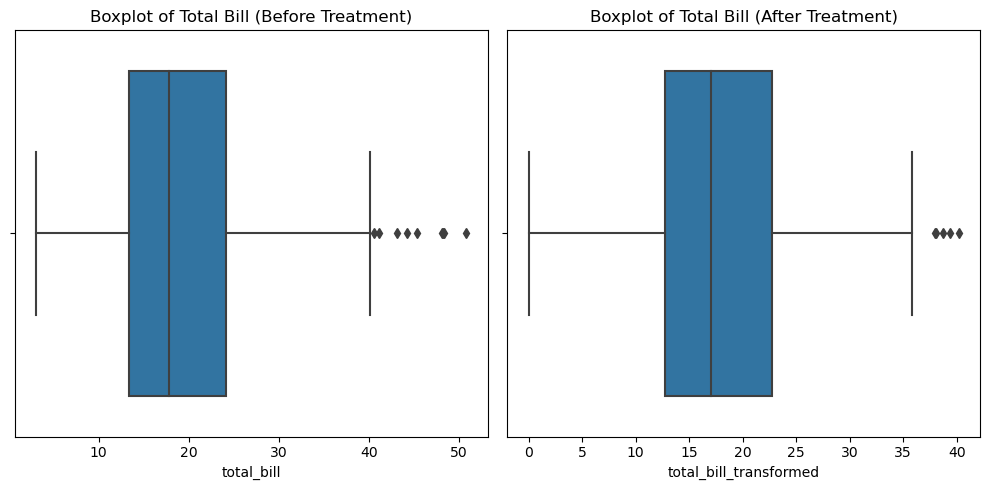

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Plot boxplot before treatment
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['total_bill'])
plt.title('Boxplot of Total Bill (Before Treatment)')

# Identify outliers
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Treat outliers with log transformation
df['total_bill_transformed'] = df['total_bill'].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else None)
df['total_bill_transformed'] = df['total_bill_transformed'].apply(lambda x: x if x is None else max(0, x))  # Replace negative values with 0
# Plot boxplot after treatment
plt.subplot(1, 2, 2)
sns.boxplot(x=df['total_bill_transformed'])
plt.title('Boxplot of Total Bill (After Treatment)')

plt.tight_layout()
plt.show()

 this code:

We first plot a boxplot of the 'total_bill' column before treatment to visualize any outliers.
We then identify outliers using the Interquartile Range (IQR) method.
After identifying outliers, we treat them using a transformation approach. Here, we apply a log transformation to the 'total_bill' column and create a new column 'total_bill_transformed'.
We plot a boxplot of the transformed 'total_bill' column to visualize the effect of treatment on outliers.
This code will help you identify and treat outliers in the 'total_bill' column using a transformation approach and visualize the boxplot before and after treatment.

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

In [29]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Calculate Q1 and Q3
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]

# Display the filtered DataFrame
print("DataFrame after removing outliers:")
print(df_filtered)


DataFrame after removing outliers:
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
238       35.83  4.67  Female     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[235 rows x 7 columns]


This code will remove outliers from the 'tip' column using the IQR technique and display the filtered DataFrame. The DataFrame df_filtered contains the rows where the 'tip' values are within the lower and upper bounds, effectively removing the outliers.

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [30]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'])

# Print random 5 samples from the encoded DataFrame
print("Random 5 samples from the encoded DataFrame:")
print(df_encoded.sample(5))


Random 5 samples from the encoded DataFrame:
     total_bill   tip  size  sex_Female  sex_Male  smoker_No  smoker_Yes  \
83        32.68  5.00     2           0         1          0           1   
79        17.29  2.71     2           0         1          1           0   
98        21.01  3.00     2           0         1          0           1   
6          8.77  2.00     2           0         1          1           0   
143       27.05  5.00     6           1         0          1           0   

     day_Fri  day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  
83         0        0        0         1            0           1  
79         0        0        0         1            0           1  
98         1        0        0         0            1           0  
6          0        0        1         0            1           0  
143        0        0        0         1            0           1  


This code will encode the categorical columns ('sex', 'smoker', 'day', 'time') using one-hot encoding with pandas'get_dummies() function. Then, it will print random 5 samples from the encoded DataFrame df_encoded. Each categorical value will be represented as a binary feature in the encoded DataFrame.
Try GPT-4 free for 14 days

### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [31]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Check the range of the 'total_bill' column
min_total_bill = df['total_bill'].min()
max_total_bill = df['total_bill'].max()
range_total_bill = max_total_bill - min_total_bill

print("Range of the 'total_bill' column:", range_total_bill)

# Transform the values to have a range of 1
df['total_bill_transformed'] = (df['total_bill'] - min_total_bill) / range_total_bill

# Display the DataFrame with transformed values
print("\nDataFrame with transformed 'total_bill' column:")
print(df[['total_bill', 'total_bill_transformed']].head())


Range of the 'total_bill' column: 47.74

DataFrame with transformed 'total_bill' column:
   total_bill  total_bill_transformed
0       16.99                0.291579
1       10.34                0.152283
2       21.01                0.375786
3       23.68                0.431713
4       24.59                0.450775


This code will:
Calculate the range of the 'total_bill' column.
Transform the values of the 'total_bill' column using min-max scaling to ensure that the range becomes 1.
Create a new column 'total_bill_transformed' in the DataFrame to store the transformed values.
Print the first few rows of the DataFrame with both the original and transformed 'total_bill' columns.

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset into a pandas DataFrame
tips_df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Encode the categorical variables
tips_df = pd.get_dummies(tips_df, columns=['sex', 'smoker', 'day', 'time'])

# Store the target column ('tip') in the y variable
y = tips_df['tip']

# Store the rest of the columns in the X variable
X = tips_df.drop(columns=['tip'])

# Display the first few rows of the X and y variables
print("X (features):")
print(X.head())

print("\ny (target):")
print(y.head())


X (features):
   total_bill  size  sex_Female  sex_Male  smoker_No  smoker_Yes  day_Fri  \
0       16.99     2           1         0          1           0        0   
1       10.34     3           0         1          1           0        0   
2       21.01     3           0         1          1           0        0   
3       23.68     2           0         1          1           0        0   
4       24.59     4           1         0          1           0        0   

   day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  
0        0        1         0            1           0  
1        0        1         0            1           0  
2        0        1         0            1           0  
3        0        1         0            1           0  
4        0        1         0            1           0  

y (target):
0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64


In this code:

We load the dataset into a pandas DataFrame named "tips_df".
We use one-hot encoding to encode the categorical variables.
We store the target column 'tip' in the variable y.
We store the rest of the columns (features) in the variable X.
We display the first few rows of the X and y variables to verify the data.

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset into a pandas DataFrame
tips_df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# Split the dataset into features (X) and target (y)
X = tips_df.drop(columns=['tip'])
y = tips_df['tip']

# Split the dataset into train and test sets (70% train and 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the columns 'total_bill' and 'size' using Min-Max scaling
scaler = MinMaxScaler()
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])

# Display the first few rows of the standardized train and test sets
print("Standardized X_train:")
print(X_train.head())

print("\nStandardized X_test:")
print(X_test.head())


Standardized X_train:
     total_bill   sex smoker  day    time  size
234    0.217044  Male    Yes  Sat  Dinner   0.2
227    0.326232  Male     No  Sat  Dinner   0.6
180    0.641367  Male    Yes  Sun  Dinner   0.6
5      0.433644  Male     No  Sun  Dinner   0.6
56     0.715934  Male    Yes  Sat  Dinner   0.6

Standardized X_test:
     total_bill     sex smoker   day    time  size
24     0.312250    Male     No   Sat  Dinner   0.2
6      0.067022    Male     No   Sun  Dinner   0.2
153    0.417221    Male     No   Sun  Dinner   0.6
211    0.446960    Male    Yes   Sat  Dinner   0.6
198    0.160897  Female    Yes  Thur   Lunch   0.2


In this code:

We first load the dataset into a pandas DataFrame.
We split the dataset into features (X) and target (y).
We use the train_test_split function to split the dataset into train and test sets, with 70% for training and 30% for testing.
We use the MinMaxScaler to standardize the columns 'total_bill' and 'size' using min-max scaling.
We fit the scaler on the training data and transform both the training and testing data.
Finally, we display the first few rows of the standardized train and test sets to verify the transformation.



### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset into a pandas DataFrame
tips_df = pd.read_csv(r'C:\Users\PURNANGSHU ROY\OneDrive\Desktop\data\tips.csv')

# One-hot encode categorical variables
tips_df = pd.get_dummies(tips_df, columns=['sex', 'smoker', 'day', 'time'])

# Split the dataset into features (X) and target (y)
X = tips_df.drop(columns=['tip'])
y = tips_df['tip']

# Split the dataset into train and test sets (70% train and 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared value:", r_squared)


R-squared value: 0.2930966744126685


### Happy Learning:)